## import base input targetlist

In [2]:
# inputs

# targetlist fname
targetlist_fname = '/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 3/20250314_ChanoulSeo_FourScenarioPlanets_MetaData.csv'

# Retrieval folder
retrieval_folder = "./retrievals/Tier1"

# forwards folder
forwards_folder = "./forwards/ArielInstrumentTier1"

# models

comp_folders = ["/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 3/20250314_CompoProfile"]

pt_folders = ["/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 3/20250314_PTprofile"]

# out tab
out_tab_fname = 'Tier1_data_analyzed.csv'



In [3]:
import sys
import os

# Add the current notebook's directory to the Python path
sys.path.append(os.getcwd())

# Now import the function
from inspector import Inspector

# Create an instance of the Inspector class
inspector = Inspector(targetlist_fname, retrieval_folder, forwards_folder)


## Load retrievals

In [4]:
inspector.load_retrievals()

loading retrieval data


100%|██████████| 40/40 [00:00<00:00, 272.61it/s]


found 40 valid planets


100%|██████████| 40/40 [00:00<00:00, 154.79it/s]


In [5]:
inspector.missing_planets

<bound method Inspector.missing_planets of <inspector.Inspector object at 0x7f2891788940>>

## load Ariel's data

In [6]:
inspector.load_ariel_data()

loading ariel data


100%|██████████| 40/40 [00:00<00:00, 228.35it/s]


## load profile data

In [7]:
inspector.laod_profiles(comp_folders, pt_folders)

loading profiles


100%|██████████| 40/40 [00:00<00:00, 163.00it/s]


## Compute metallicities

In [8]:
inspector.compute_elemental_ratios()
inspector.compute_profile_ratios()

computing elemental ratios


100%|██████████| 40/40 [00:00<00:00, 1717.24it/s]


computing profile ratios


100%|██████████| 40/40 [00:00<00:00, 3089.44it/s]


## saving data

In [9]:
inspector.save_table(out_tab_fname)

Table saved to Tier1_data_analyzed.csv


# Let's do some plotting now

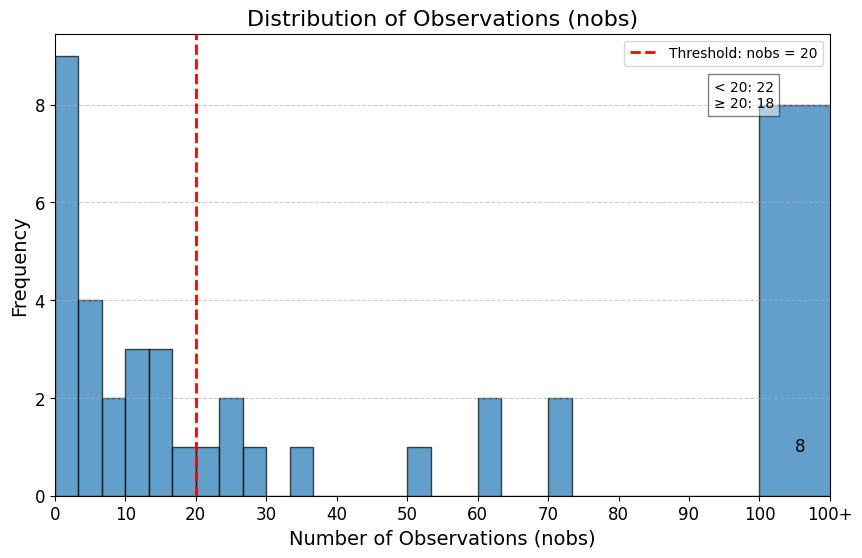

In [10]:
inspector.plot_nobs()

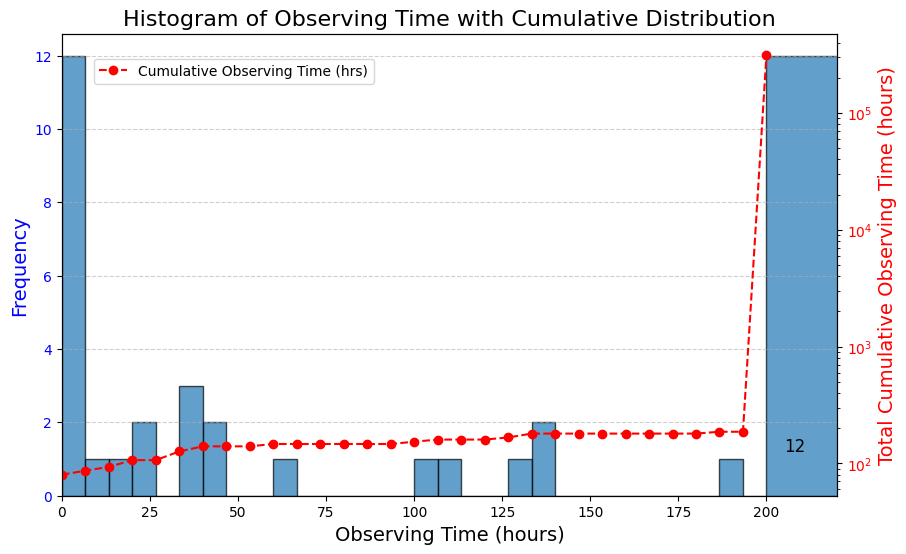

In [11]:
inspector.plot_obs_time()

## validate retrieval

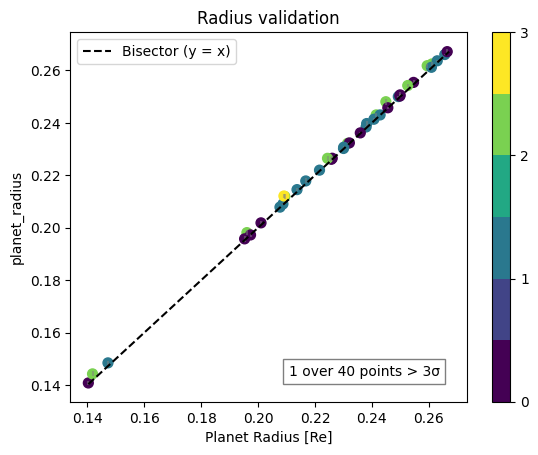

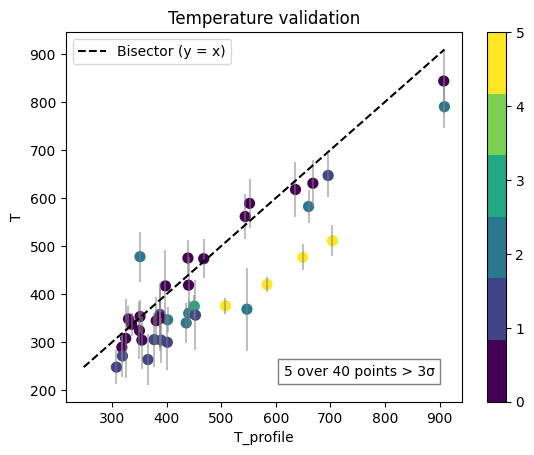

In [12]:
import astropy.units as u
inspector.plot_comparison('Planet Radius [Re]', 'planet_radius', 'planet_radius_sigma_p', 'planet_radius_sigma_m', title="Radius validation", conversion_factor=u.R_earth.to(u.R_jup))

inspector.plot_comparison('T_profile', 'T', 'T_sigma_p', 'T_sigma_m', title="Temperature validation")


## notes
- under estimation of temperature might be expected. 
- No cstrong correlation with failing water fit

/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/week 3/inspector.py:501: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar


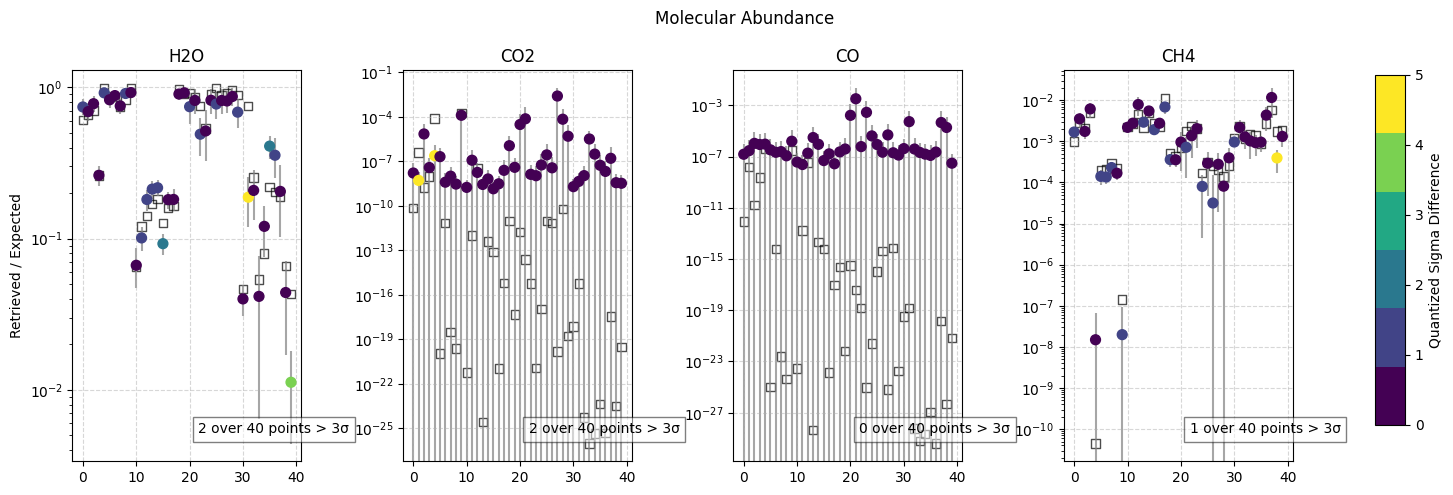

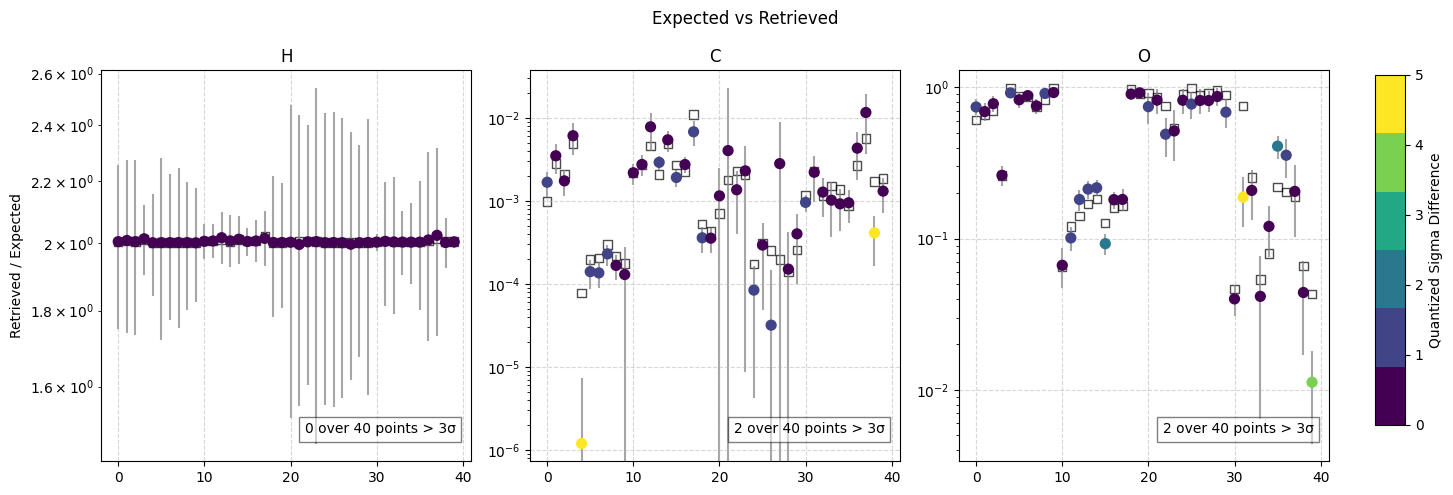

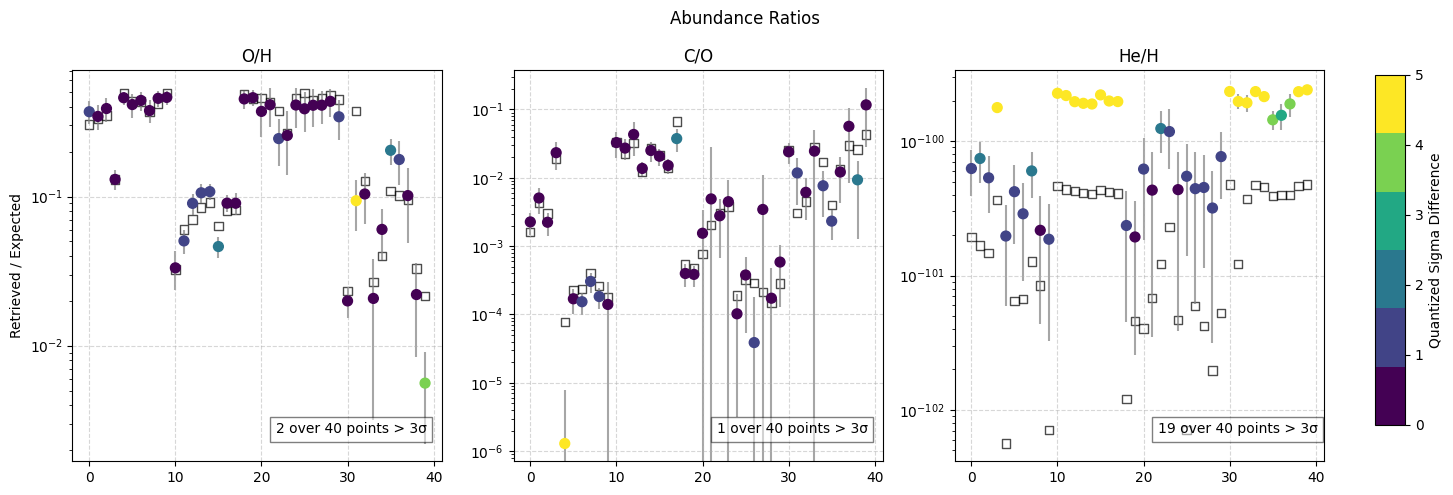

In [13]:
inspector.plot_comparison_panels(keys=["H2O", "CO2", "CO", "CH4"], title="Molecular Abundance")

inspector.plot_comparison_panels(keys=["H", "C", "O"], title="Expected vs Retrieved")

inspector.plot_comparison_panels(keys=["O/H", "C/O", "He/H"], title="Abundance Ratios")



## notes

- water is failing because conditions are changed: we have priors on the water abundance up to 0.7, but inputs go up to 1.0. This is why the retrieval is failing. We need to fix this. 
- most of the O comes from water, so we need to fix this.


/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/week 3/inspector.py:555: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax_scatter.scatter(
/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/week 3/inspector.py:555: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax_scatter.scatter(


Text(0.5, 0.98, 'Input values')

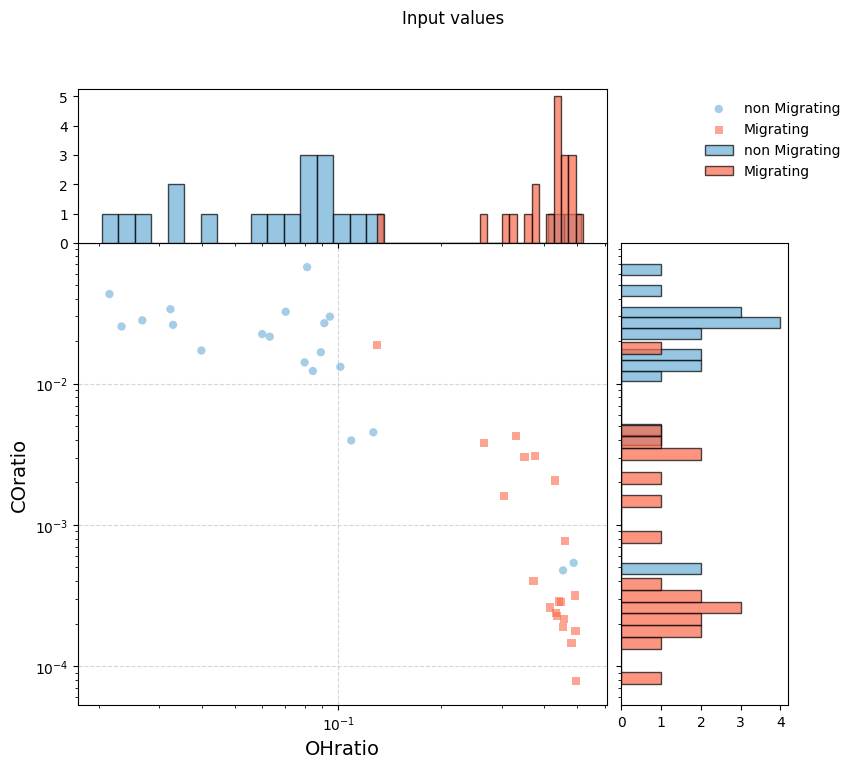

In [14]:


fig, ax_s, ax_hx, ax_hy, ax_leg, global_norm, = inspector.plot_scatter_with_histograms(
    selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==0, 
    x_key= "OHratio", y_key="COratio",
    label="non Migrating", marker="o", cmap="Blues", hist_color="blue"
)

inspector.plot_scatter_with_histograms(
    selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==1, 
    x_key="OHratio", y_key="COratio",
    label="Migrating", marker="s", cmap="Reds", hist_color="red",
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig, global_norm=global_norm
)
fig.suptitle("Input values")

Text(0.5, 0.98, 'Retrievals compared')

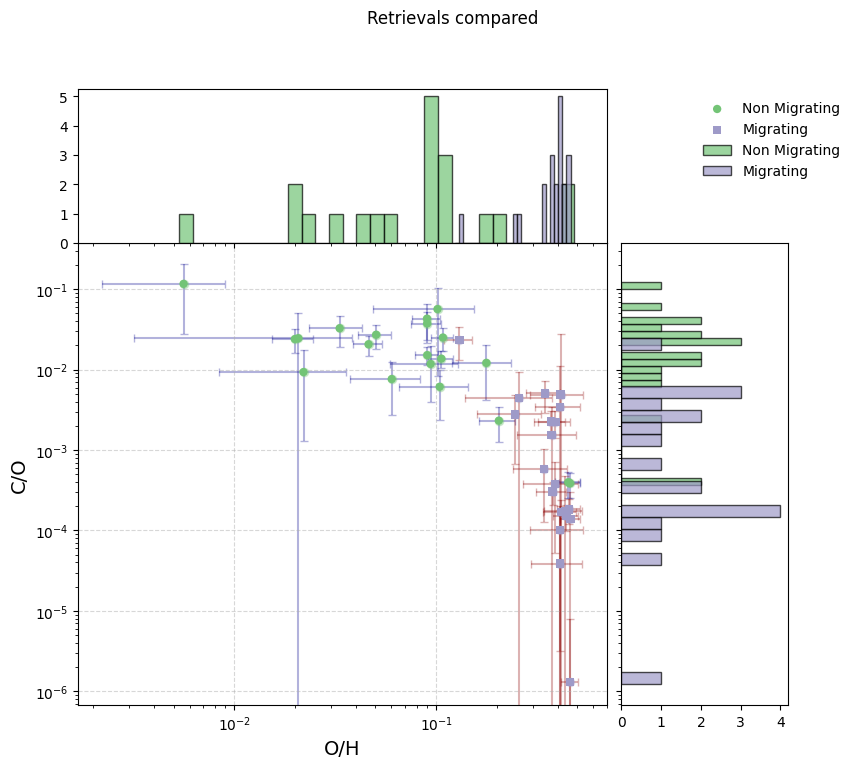

In [15]:

fig, ax_s, ax_hx, ax_hy, ax_leg, global_norm = inspector.plot_scatter_with_histograms(
    selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==0, 
    x_key="O/H", y_key="C/O", 
    x_err_key="O/H_sigma", y_err_key="C/O_sigma", 
    # color_key="He/H", 
    label="Non Migrating", marker="o", cmap="Greens", hist_color="green", alpha=1,
    err_color="darkblue", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3
)

inspector.plot_scatter_with_histograms(
    selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==1, 
    x_key="O/H", y_key="C/O", 
    x_err_key="O/H_sigma", y_err_key="C/O_sigma", 
    # color_key="He/H", 
    label="Migrating", marker="s", cmap="Purples", hist_color="purple", alpha=1,
    err_color="darkred", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, global_norm=global_norm, fig=fig)

fig.suptitle("Retrievals compared")

/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/week 3/inspector.py:550: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax_scatter.scatter(


(<Figure size 1000x800 with 4 Axes>,
 <Axes: title={'center': 'Scatter Plot of O/H vs C/O'}, xlabel='O/H', ylabel='C/O'>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 None)

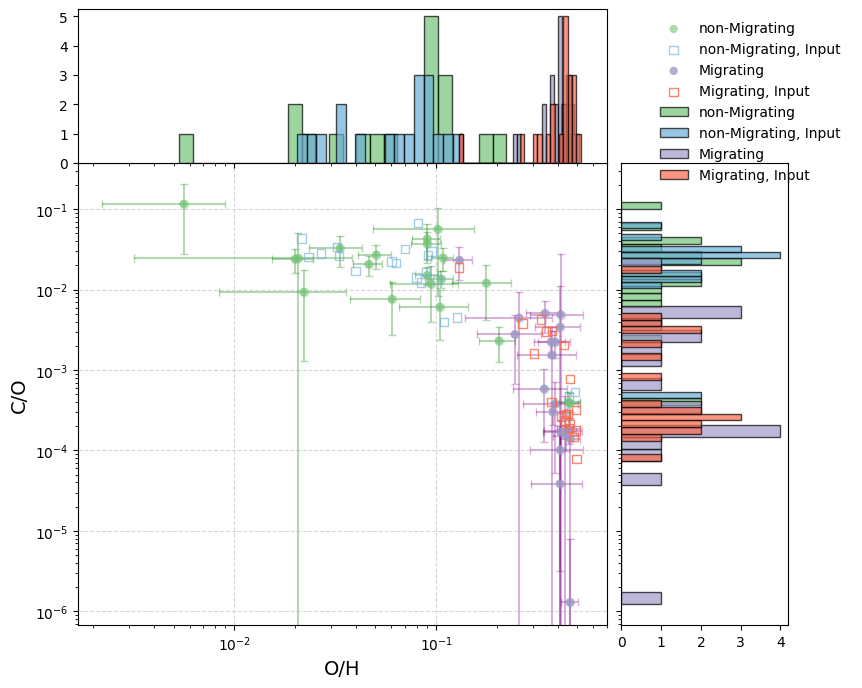

In [16]:
fig, ax_s, ax_hx, ax_hy, ax_leg, global_norm = inspector.plot_scatter_with_histograms(
    selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==0, 
    x_key="O/H", y_key="C/O", 
    x_err_key="O/H_sigma", y_err_key="C/O_sigma", 
    label="non-Migrating", marker="o", cmap="Greens", hist_color="green",
    err_color="green", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3
)

inspector.plot_scatter_with_histograms(
    selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==0, 
    x_key="OHratio", y_key="COratio", 
    label="non-Migrating, Input", marker="s", cmap="Blues", hist_color="orange", contour_only=True,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)


inspector.plot_scatter_with_histograms(
    selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==1, 
    x_key="O/H", y_key="C/O", 
    x_err_key="O/H_sigma", y_err_key="C/O_sigma", 
    label="Migrating", marker="o", cmap="Purples", hist_color="purple", alpha=0.8,
    err_color="purple", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)


inspector.plot_scatter_with_histograms(
    selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==1, 
    x_key="OHratio", y_key="COratio", 
    label="Migrating, Input", marker="s", cmap="Reds", hist_color="red", alpha=0.8, contour_only=True,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)



/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/week 3/inspector.py:667: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  data_scatter = ax_scatter.scatter(
/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/week 3/inspector.py:667: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  data_scatter = ax_scatter.scatter(


(<Figure size 1000x800 with 4 Axes>,
 <Axes: title={'center': 'Scatter Plot of O/H vs C/O'}, xlabel='O/H', ylabel='C/O'>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 None)

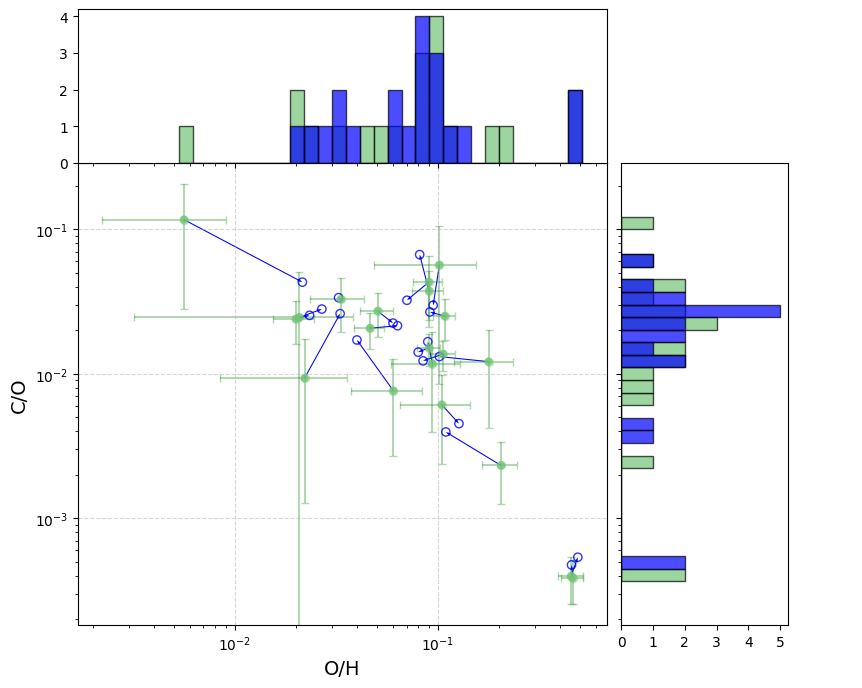

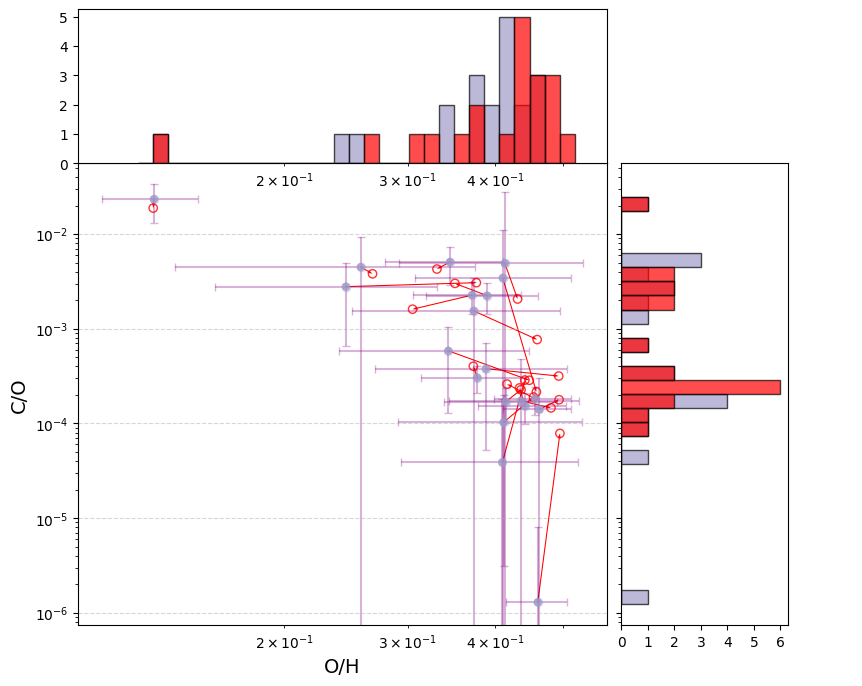

In [17]:
inspector.plot_scatter_with_histograms_compared_with_expectation(
        selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==0, 
        color_key=None, expect_color="b",
        label="non-Migrating", marker="o", cmap="Greens", hist_color="green",  alpha=0.8,
        err_color="green", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3
        )

inspector.plot_scatter_with_histograms_compared_with_expectation(
    selection = inspector.out_targetlist["Migration Efficiency [ Inefficient = 0, Efficient = 1]"]==1, 
    label="Migrating", marker="o", cmap="Purples", hist_color="purple", alpha=0.8, expect_color="r",
    err_color="purple", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3
    )

